<h1 style="color:RED">NPL DATA_SET AND VISUALIZATION</h1>

In [100]:
#importing the required libraries in the npl_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json



In [101]:
#loading the json file first 
with open("npl_data.json",'r') as file:
    data=json.load(file)

In [102]:
#1... Data preparation and cleaning 

#Team DataFrame 
#first of all normalizing the data for the uniform scale 
teams_df=pd.json_normalize(data['teams'])
teams_df=teams_df[['Id','Name','Captain','Players']]

#to remove the big bracket from the column players we use the join method 
teams_df["Players"] = teams_df["Players"].apply(lambda x: ','.join(x))
teams_df

,Id,Name,Captain,Players
0,BK,Biratnagar Kings,Sandeep Lamichhane,"Lokesh Bam,Pratish GC,Bashir Ahmad,Rajesh Pula..."
1,CWR,Chitwan Rhinos,Kushal Malla,"Rijan Dhakal,Kamal Singh Airee,Sharad Vesawkar..."
2,JB,Janakpur Bolts,Aasif Sheikh,"Lalit Rajbanshi,Anil Kumar Sah,Rupesh K Singh,..."
3,KNY,Karnali Yaks,Sompal Kami,"Gulshan Kumar Jha,Nandan Yadav,Mausam Dhakal,A..."
4,KMG,Kathmandu Gurkhas,Karan KC,"Shahab Alam,Bhim Sharki,RashId Khan,Shankar Ra..."
5,LBL,Lumbini Lions,Rohit Kumar Paudel,"Surya Tamang,Bibek Yadav,Sundeep Jora,Aashutos..."
6,PKA,Pokhara Avengers,Kushal Bhurtel,"Sagar Dhakal,Aakash Chand,Kiran Kumar Thagunna..."
7,SPR,Sudurpaschim Royals,Dipendra Singh Airee,"Md Aarif Sheikh,Abinash Bohara,Binod Bhandari,..."


In [103]:
#Creating the Dataframe of the matches 
matches_list=[]
for match in data['matches']:
    for match_key,match_details in match.items():
        #creating the match_info dictionary to store the details of the matches
        match_info={
            'match_number':match_details.get('match_number'),
            'date':match_details.get('date'),
            'time':match_details.get('time'),
            'title':match_details.get("TITLE") or match_details.get('title'),
            'team1':match_details['PAIRINGS'][0] if 'PAIRINGS' in match_details else None,
            'team2':match_details['PAIRINGS'][1] if 'PAIRINGS' in match_details else None, 
            'team1_runs':match_details['score'][0]['runs'] if 'score' in match_details else None,
            'team2_runs':match_details['score'][1]['runs'] if 'score' in match_details else None,
            'result':match_details.get('result'),
            'player_of_the_match':match_details.get('player_of_the_match'),
            'top_batter':match_details.get('top_batter', {}).get('player'),
            'top_bowler':match_details.get('top_bowler', {}).get('player'),
            'venue':match_details.get('venue')
            
        }

        #adding the match_info also so,
        matches_list.append(match_info)
#declaring the dataframe of the matches 
matches_df=pd.DataFrame(matches_list)

    


In [104]:
#Displaying the DataFrame of the matches
matches_df

,match_number,date,time,title,team1,team2,team1_runs,team2_runs,result,player_of_the_match,top_batter,top_bowler,venue
0,1,2024/11/30,12:15 PM,BIRATNAGAR KINGS VS JANAKPUR BOLTS,BK,JKB,127,131,JKB Won By 8 Wickets,Lahiru Milantha,Lahiru Milantha,Lalit Rajbanshi,Tribhuvan University International Cricket Gro...
1,2,2024/12/02,09:00 AM,KATHMANDU GURKHAS VS CHITWAN RHINOS,KMG,CWR,111,114,CWR Won By 5 Wickets,Sohail Tanvir,Sumit Maharjan,Sohail Tanvir,Tribhuvan University International Cricket Gro...
2,3,2024/12/02,01:00 PM,JANAKPUR BOLTS VS KARNALI YAKS,JKB,KNY,141,142,JKB Won By 8 Wickets,Anil Sah,Anil Sah,Mohammad Mohsin,Tribhuvan University International Cricket Gro...
3,4,2024/12/03,09:00 AM,SUDURPASCHIM ROYALS VS BIRATNAGAR KINGS,SPR,BK,182,92,SPR Won By 90 Runs,Dipendra Singh Airee,Dipendra Singh Airee,Abinash Bohara,Tribhuvan University International Cricket Gro...
4,5,2024/12/03,01:00 PM,CHITWAN RHINOS VS POKHARA AVENGERS,CWR,PKA,161,74,CWR Won By 87 Runs,Rijan Dhakal,Ravi Bopara,Sohail Tanvir,Tribhuvan University International Cricket Gro...
5,6,2024/12/04,09:00 AM,KARNALI YAKS VS KATHMANDU GURKHAS,KNY,KMG,149,153,KMG Won By 3 Wickets,Sumit Maharjan,Shikhar Dhawan,Gerhard Erasmus,Tribhuvan University International Cricket Gro...
6,7,2024/12/04,01:00 PM,BIRATNAGAR KINGS VS LUMBINI LIONS,BK,LBL,191,193,BK Won By 2 Wickets,Lokesh Bam,Lokesh Bam,Durgesh Gupta,Tribhuvan University International Cricket Gro...
7,8,2024/12/05,09:00 AM,POKHARA AVENGERS VS JANAKPUR BOLTS,None,None,138,143,JKB Won By 7 Wickets,James Neesham,Lahiru Milantha,Lalit Rajbanshi,Tribhuvan University International Cricket Gro...
8,9,2024/12/05,01:00 PM,KATHMANDU GURKHAS VS SUDURPASCHIM ROYALS,None,None,167,94,SPR Won By 73 Runs,Naren Saud,Brandon McMullen,Naren Saud,Tribhuvan University International Cricket Gro...
9,10,2024/12/06,09:00 AM,KARNALI YAKS VS CHITWAN RHINOS,None,None,130,132,KNY Won By 6 Wickets,Bipin Sharma,Ravi Bopara,Bipin Sharma,Tribhuvan University International Cricket Gro...


In [105]:
#Creating the points table DataFrame 
points_table_df=pd.DataFrame(data['points_table'])

In [106]:
#Displaying the points table DataFrame
points_table_df

,rank,team,matches_played,wins,losses,nrr,points
0,1,Sudurpaschim Royals,7,6,1,+2.087,12
1,2,Janakpur Bolts,7,6,1,+0.164,10
2,3,Pokhara Avengers,7,5,2,+1.200,10
3,4,Karnali Yaks,7,4,3,+0.300,8
4,5,Chitwan Rhinos,7,3,4,-0.100,6
5,6,Kathmandu Gurkhas,7,2,5,-0.500,4
6,7,Biratnagar Kings,7,1,6,-1.800,2
7,8,Lumbini Lions,7,1,6,-2.100,2


In [107]:
#creating the result dataframe by converting it to the uniform scale data 
result_df=pd.json_normalize(data['result'])

In [108]:
#creating the dictionary for the result  
results_dict={}
for item in data['result']:
    for key,value in item.items():
        results_dict[key]=value

#creating the dataframe from the dictionary method 
result_df=pd.DataFrame([results_dict])

In [109]:
#displaying the result dataframe 
#only creating the first ,second and third place in the match results 
result_df

,winner,runner_up,third_place
0,Janakpur Bolts,Sudurpaschim Royals,Pokhara Avengers


In [110]:
#Exploratory Data Analysis (EDA)

#Team performance Analysis(How many times an individual team win in the matches)
matches_df['winning_team']=matches_df['result'].str.extract(r'(\b\w+\b) Won')
team_wins=matches_df['winning_team'].value_counts().reset_index()
team_wins.columns=['Team','Wins']

In [111]:
#Displaying the team perfomance analysis 
team_wins

,Team,Wins
0,JKB,7
1,SPR,7
2,KNY,5
3,CWR,4
4,KMG,4
5,BK,2
6,PKA,1
7,LBL,1


In [112]:
#player performance analysis 
#analysing the performance of the player by displaying the top batter and the bollower in the entire npl league

top_batters=matches_df.groupby('top_batter')['top_batter'].count().sort_values(ascending=False).head()
top_bowlers=matches_df.groupby('top_bowler')['top_bowler'].count().sort_values(ascending=False).head()

In [113]:
top_batters

top_batter
Lahiru Milantha    3
William Bosisto    2
Anil Sah           2
Binod Bhandari     2
Ravi Bopara        2
Name: top_batter, dtype: int64

In [114]:
#displaying the top bowlers 
top_bowlers


top_bowler
Lalit Rajbanshi    4
Kishore Mahato     2
Bipin Khatri       2
Bipin Sharma       2
Sohail Tanvir      2
Name: top_bowler, dtype: int64

In [115]:
#making  the top scorers 
top_scorers=matches_df.groupby('top_batter')['team1_runs'].sum().sort_values(ascending=False).head()

In [116]:
# Creating a DataFrame for top scorers
top_scorers_df = top_scorers.reset_index()
top_scorers_df.columns = ['Player', 'Runs']
top_scorers_df


,Player,Runs
0,Lahiru Milantha,449
1,Ravi Bopara,291
2,Anil Sah,277
3,Binod Bhandari,262
4,William Bosisto,261


In [117]:
#top_wicket_takers in the league by the matches 
top_wicket_takers=matches_df.groupby('top_bowler')['team1_runs'].count().sort_values(ascending=False)

In [118]:
#displaying the top wicket takers in the league 
top_wicket_takers_df=top_wicket_takers.reset_index()
top_wicket_takers_df.columns=['Player','No of Wickets']
top_wicket_takers_df.head()

,Player,No of Wickets
0,Lalit Rajbanshi,4
1,Kishore Mahato,2
2,Bipin Khatri,2
3,Bipin Sharma,2
4,Sohail Tanvir,2


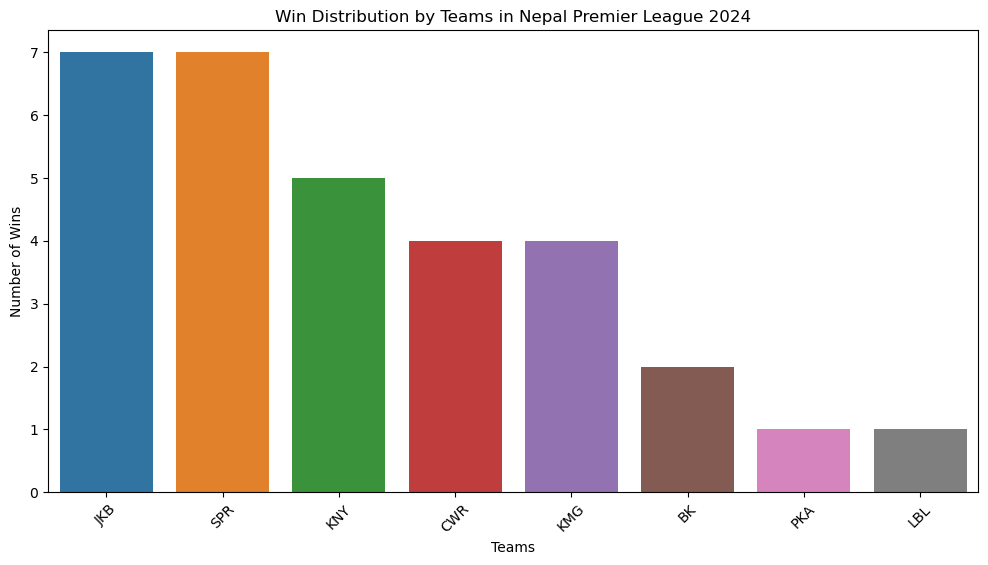

In [119]:
#Data Visualization 

#Win Distribution 
plt.figure(figsize=(12,6))
sns.barplot(data=team_wins,x="Team",y='Wins',hue="Team",legend=False)
plt.title('Win Distribution by Teams in Nepal Premier League 2024')
plt.xlabel("Teams")
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.show()

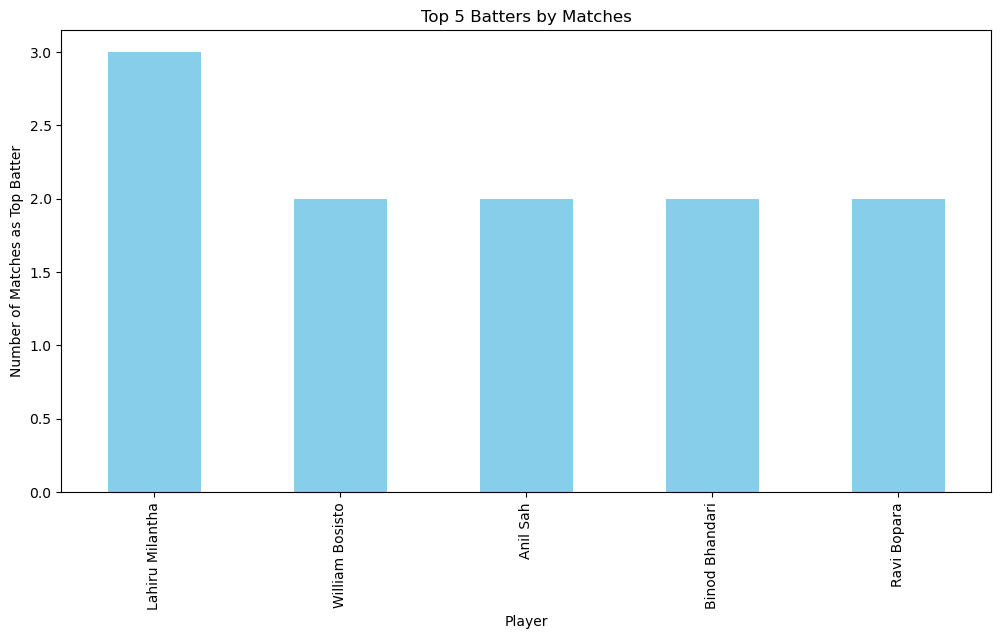

In [120]:
#Top Batters 
top_batters.plot(kind='bar',color='skyblue',figsize=(12,6))
plt.title('Top 5 Batters by Matches')
plt.xlabel('Player')
plt.ylabel("Number of Matches as Top Batter")
plt.show()

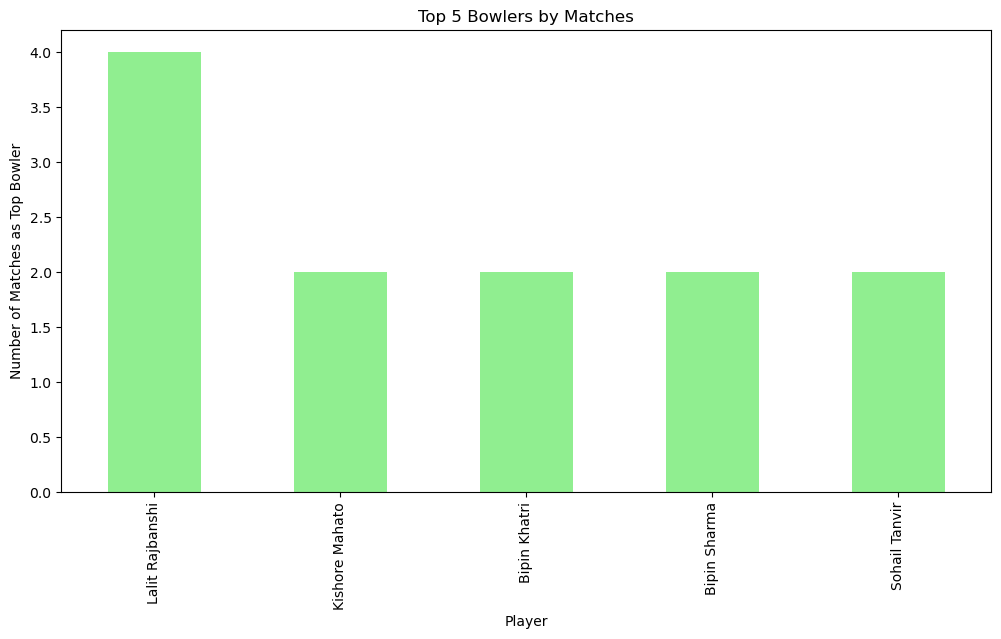

In [121]:
#Top Bowlers 
top_bowlers.plot(kind='bar',color='lightgreen',figsize=(12,6))
plt.title('Top 5 Bowlers by Matches')
plt.xlabel('Player')
plt.ylabel("Number of Matches as Top Bowler")
plt.show()


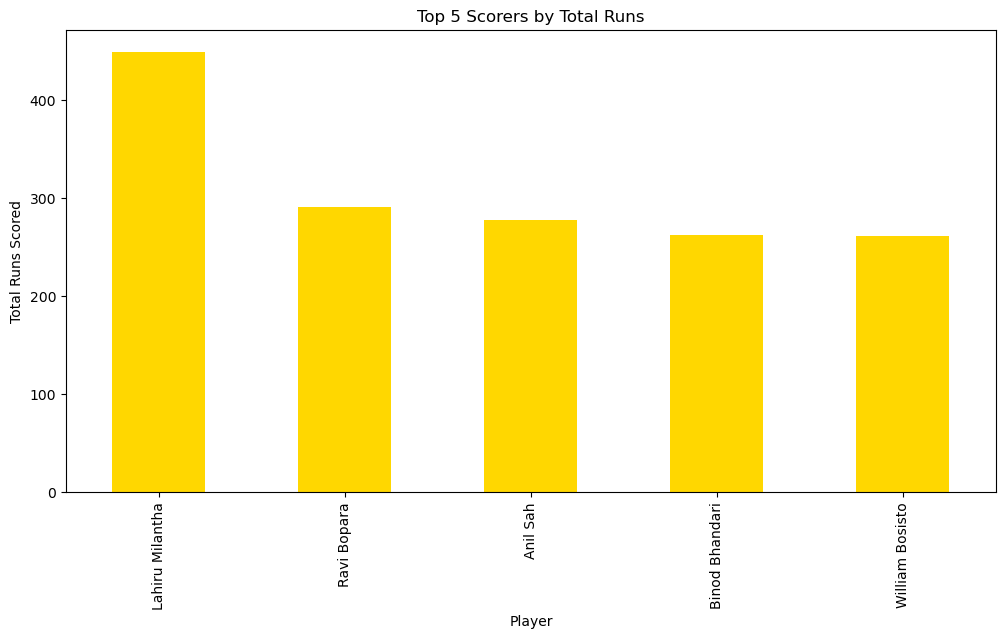

In [122]:
#visualizing the top scorers 
top_scorers.plot(kind='bar',color='gold',figsize=(12,6))
plt.title('Top 5 Scorers by Total Runs')
plt.xlabel('Player')
plt.ylabel('Total Runs Scored')
plt.show()


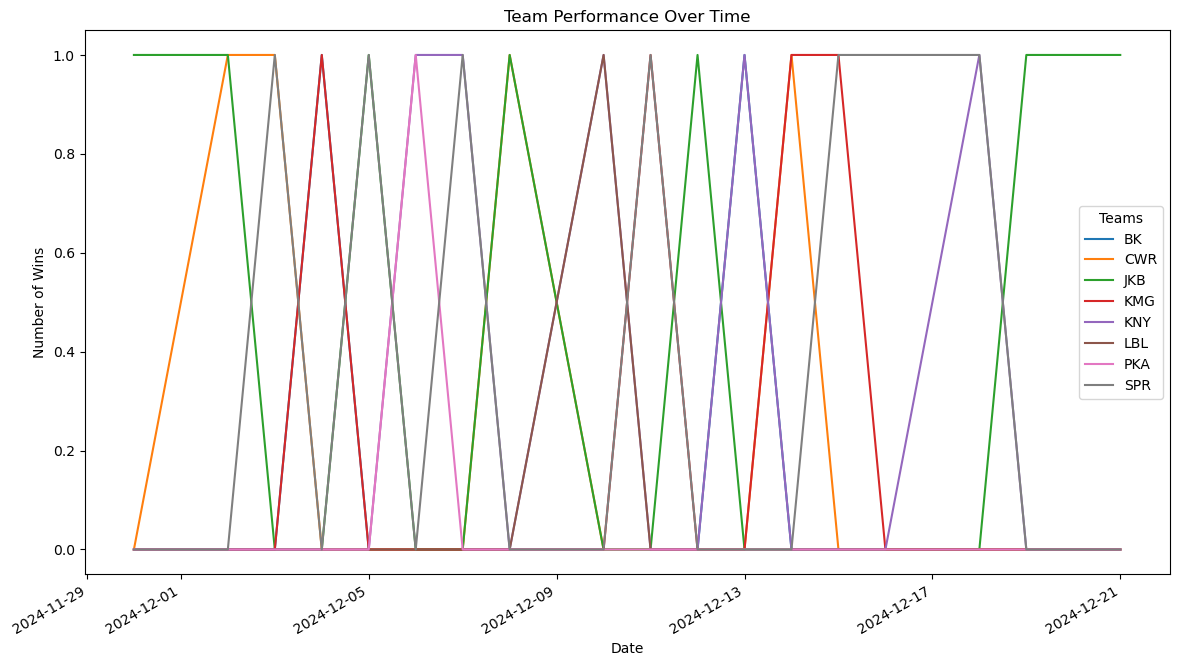

In [123]:
#to visualize the team performance over the time 
matches_df['date'] = pd.to_datetime(matches_df['date'])
performance_over_time = matches_df.groupby(['date', 'winning_team']).size().unstack(fill_value=0)
performance_over_time.plot(kind='line', figsize=(14, 8))
plt.title('Team Performance Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Wins')
plt.legend(title='Teams')
plt.show()


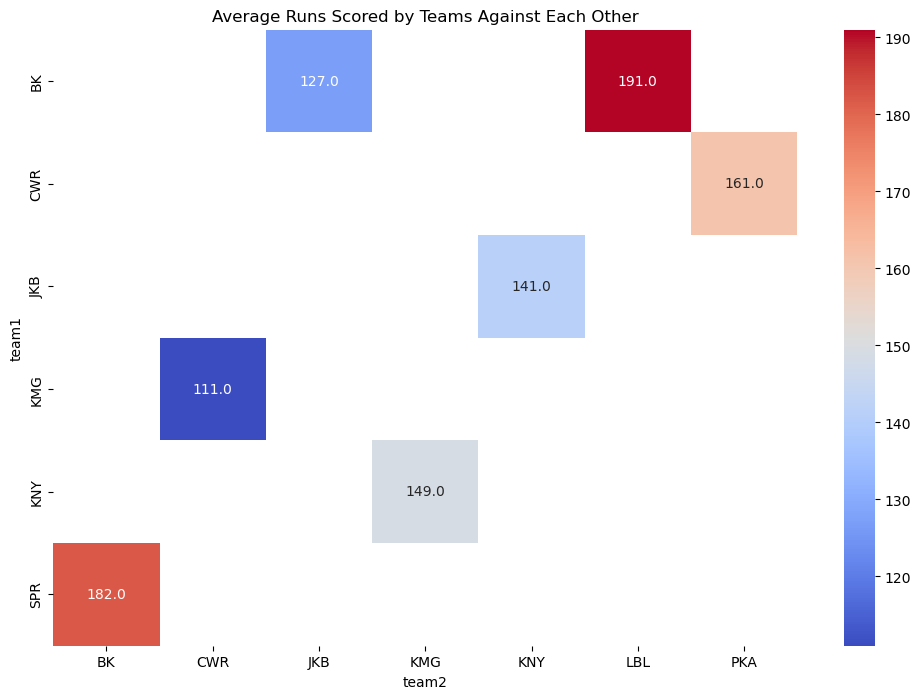

In [124]:
#match results heatmap 
pivot_table=matches_df.pivot_table(index='team1',columns='team2',values='team1_runs',aggfunc='mean')
plt.figure(figsize=(12,8))
sns.heatmap(pivot_table,annot=True,cmap="coolwarm",fmt='.1f')
plt.title("Average Runs Scored by Teams Against Each Other")
plt.show()
